In [14]:
import numpy as np
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import qr
import itertools
from scipy.special import erfc

from Dec import Dec

In [15]:
H = np.array([
    [1,1,1,0,0,0,0,0,0],
    [0,0,0,1,1,1,0,0,0],
    [0,0,0,0,0,0,1,1,1],
    [1,0,0,1,0,0,1,0,0],
    [0,1,0,0,1,0,0,1,0],
    [0,0,1,0,0,1,0,0,1]
])

# H = np.array([
#     [1,1,1,0,1,0,0],
#     [0,0,0,1,0,1,1],
#     [1,1,0,1,0,0,1],
#     [0,0,1,0,1,1,0]
# ])

print("H : \n",H)

n = H.shape[1]
binary_vectors = [np.array(v) for v in itertools.product([0, 1], repeat=n)]
C = []
for c in binary_vectors:
    if np.sum(np.dot(H,c.T)%2)==0:
        C.append(c)

print("\nCodewords :")
C = np.array(C)
print(C)

dmin = np.min(np.sum(C[1:],axis=1))
print("dmin = ",dmin)


H : 
 [[1 1 1 0 0 0 0 0 0]
 [0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1]
 [1 0 0 1 0 0 1 0 0]
 [0 1 0 0 1 0 0 1 0]
 [0 0 1 0 0 1 0 0 1]]

Codewords :
[[0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 1 1]
 [0 0 0 1 0 1 1 0 1]
 [0 0 0 1 1 0 1 1 0]
 [0 1 1 0 0 0 0 1 1]
 [0 1 1 0 1 1 0 0 0]
 [0 1 1 1 0 1 1 1 0]
 [0 1 1 1 1 0 1 0 1]
 [1 0 1 0 0 0 1 0 1]
 [1 0 1 0 1 1 1 1 0]
 [1 0 1 1 0 1 0 0 0]
 [1 0 1 1 1 0 0 1 1]
 [1 1 0 0 0 0 1 1 0]
 [1 1 0 0 1 1 1 0 1]
 [1 1 0 1 0 1 0 1 1]
 [1 1 0 1 1 0 0 0 0]]
dmin =  4


In [16]:
channel_model = "bsc"
channel_parameters = [0.2]
num_iter = 1000
cluster_size = 2
tg = Dec(H,channel_model,channel_parameters,num_iter,cluster_size)
print("Tanner Graph Adjacency list")
tg.print_graph("list")

Tanner Graph Adjacency list
CN :  [[0, 1, 2], [3, 4, 5], [6, 7, 8], [0, 3, 6], [1, 4, 7], [2, 5, 8]]
VN :  [[0, 3], [0, 4], [0, 5], [1, 3], [1, 4], [1, 5], [2, 3], [2, 4], [2, 5]]


### Actual codeword sent

In [17]:
c = C[np.random.choice(len(C))]
print("Actual Codeword : ",c)
print("H.cT = ",np.dot(c,H.T)%2)

Actual Codeword :  [1 1 0 0 0 0 1 1 0]
H.cT =  [0 0 0 0 0 0]


### Recieved codeword

In [18]:
# p = channel_parameters[0]

# error_array = np.random.binomial(1, p, size=len(c))
# y = (c+error_array)%2
# # y = np.array([1,1,0,1,0,0,0,1,0])
# print("Recieved Vector : \t",np.round(y,2))
# print("Error Vector :  \t",(y+c)%2)


sigma = 1.5
y = np.power(-1,c) + np.random.normal(loc=0, scale=sigma, size=c.shape)
# y = np.array([1,1,0,1,0,0,0,1,0])
# y = np.array([0.2,-0.3,1.2,-0.5,0.8,0.6,-1.1])
print("Recieved Vector : \t",np.round(y,2))
y_rec = np.array([1 if val<0 else 0 for val in y])
print("Demodulated, it is : ",y_rec)
print("Error Vector :  \t",(y_rec+c)%2)
if np.sum((y_rec+c)%2)>dmin//2:
    print("errors greater dmin/2!")

Recieved Vector : 	 [-0.69  1.48  3.07  2.44  0.49 -0.74 -2.85 -1.04  2.87]
Demodulated, it is :  [1 0 0 0 0 1 1 1 0]
Error Vector :  	 [0 1 0 0 0 1 0 0 0]


### Decoding the recieved codeword

In [19]:
c_hat = tg.decode(y,verbose="on")

Iteration :  0 	Cluster scheduled :  0
Iteration :  1 	Cluster scheduled :  1
Iteration :  2 	Cluster scheduled :  2
Iteration :  3 	Cluster scheduled :  0


In [20]:
c_hat = [1 if val else 0 for val in c_hat]
c_hat = np.array(c_hat)%2
print("Recovered vector : \t",c_hat)
print("Dot product : \t\t",np.dot(H,c_hat.T)%2)

print("Distance between decoded and transmitted codeword : ",(c_hat+c)%2)

Recovered vector : 	 [1 1 0 0 0 0 1 1 0]
Dot product : 		 [0 0 0 0 0 0]
Distance between decoded and transmitted codeword :  [0 0 0 0 0 0 0 0 0]


# BER vs SNR plot

In [21]:
H = np.array([
    [1,1,1,0,0,0,0,0,0],
    [0,0,0,1,1,1,0,0,0],
    [0,0,0,0,0,0,1,1,1],
    [1,0,0,1,0,0,1,0,0],
    [0,1,0,0,1,0,0,1,0],
    [0,0,1,0,0,1,0,0,1]
])
print("H : \n",H)


n = H.shape[1]
binary_vectors = [np.array(v) for v in itertools.product([0, 1], repeat=n)]
C = []
for c in binary_vectors:
    if np.sum(np.dot(H,c.T)%2)==0:
        C.append(c)
dmin = np.min(np.sum(C[1:],axis=1))
print("dmin = ",dmin)


H : 
 [[1 1 1 0 0 0 0 0 0]
 [0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1]
 [1 0 0 1 0 0 1 0 0]
 [0 1 0 0 1 0 0 1 0]
 [0 0 1 0 0 1 0 0 1]]
dmin =  4


In [22]:
def getBER_round_robin(snr,H,C,num_iter,N):
    # this is for bsc, similarly do for others too
    avg = 0
    tg = Dec(H,"bsc",0,num_iter,2)
    
    for i in range(N):
        c = C[np.random.choice(len(C))]
        sigma = 1/math.sqrt(snr)
        y = np.power(-1,c) + np.random.normal(loc=0, scale=sigma, size=c.shape)
        c_hat = tg.decode(y)
        c_hat = [1 if val else 0 for val in c_hat]
        c_hat = np.array(c_hat)%2
        e = np.sum((c_hat+c)%2)/len(c)
        avg = avg + e
    
    return avg/N
    

In [23]:
def getBER_flooding(snr,H,C,num_iter,N):
    # this is for bsc, similarly do for others too
    avg = 0
    tg = Dec(H,"bsc",0,num_iter,H.shape[0])
    
    for i in range(N):
        c = C[np.random.choice(len(C))]
        sigma = 1/math.sqrt(snr)
        y = np.power(- 1,c) + np.random.normal(loc=0, scale=sigma, size=c.shape)
        c_hat = tg.decode(y)
        c_hat = [1 if val else 0 for val in c_hat]
        c_hat = np.array(c_hat)%2
        e = np.sum((c_hat+c)%2)/len(c)
        avg = avg + e
    
    return avg/N
    

### Getting BER plot for flooding

In [24]:
print("BERs for flooding\n-----------------\n")
snrdb_vals = [0.1, 0.2, 0.35, 0.5, 0.9, 1.5, 2.2, 3, 3.7, 4.3, 4.9]
bers_flooding = []
N = 10000
for snrdb in snrdb_vals:
    snr = math.pow(10,snrdb/20)
    ber = getBER_flooding(snr,H,C,1000,N)
    bers_flooding.append(ber)
    print(f"BER = {ber}\t\t\t SNR(db) = {snrdb}")
#     snrdb_vals.append(snrdb)

BERs for flooding
-----------------

BER = 0.08671111111110728			 SNR(db) = 0.1
BER = 0.0865444444444409			 SNR(db) = 0.2
BER = 0.08447777777777438			 SNR(db) = 0.35
BER = 0.08054444444444105			 SNR(db) = 0.5
BER = 0.0754777777777748			 SNR(db) = 0.9
BER = 0.06738888888888643			 SNR(db) = 1.5
BER = 0.059322222222220264			 SNR(db) = 2.2
BER = 0.04922222222222114			 SNR(db) = 3
BER = 0.03825555555555499			 SNR(db) = 3.7
BER = 0.03417777777777772			 SNR(db) = 4.3
BER = 0.02725555555555591			 SNR(db) = 4.9


### Getting BER plot for round-robin

In [25]:
print("BERs for round-robin\n-----------------\n")
snrdb_vals = [0.1, 0.2, 0.35, 0.5, 0.9, 1.5, 2.2, 3, 3.7, 4.3, 4.9]
bers_round_robin = []
N = 10000
for snrdb in snrdb_vals:
    snr = math.pow(10,snrdb/20)
    ber = getBER_round_robin(snr,H,C,1000,N)
    bers_round_robin.append(ber)
    print(f"BER = {ber}\t\t\t SNR(db) = {snrdb}")
#     snrdb_vals.append(snrdb)

BERs for round-robin
-----------------

BER = 0.06892222222222347			 SNR(db) = 0.1
BER = 0.06825555555555682			 SNR(db) = 0.2
BER = 0.06618888888889005			 SNR(db) = 0.35
BER = 0.06183333333333448			 SNR(db) = 0.5
BER = 0.05355555555555653			 SNR(db) = 0.9
BER = 0.047800000000000835			 SNR(db) = 1.5
BER = 0.042033333333334005			 SNR(db) = 2.2
BER = 0.03016666666666707			 SNR(db) = 3
BER = 0.02446666666666694			 SNR(db) = 3.7
BER = 0.019588888888889034			 SNR(db) = 4.3
BER = 0.01581111111111115			 SNR(db) = 4.9


In [28]:
print("For RR : \n",bers_round_robin)
print("For Flooding : \n",bers_flooding)

For RR : 
 [0.06892222222222347, 0.06825555555555682, 0.06618888888889005, 0.06183333333333448, 0.05355555555555653, 0.047800000000000835, 0.042033333333334005, 0.03016666666666707, 0.02446666666666694, 0.019588888888889034, 0.01581111111111115]
For Flooding : 
 [0.08671111111110728, 0.0865444444444409, 0.08447777777777438, 0.08054444444444105, 0.0754777777777748, 0.06738888888888643, 0.059322222222220264, 0.04922222222222114, 0.03825555555555499, 0.03417777777777772, 0.02725555555555591]


## Plotting the BERs vs SNR (dB)

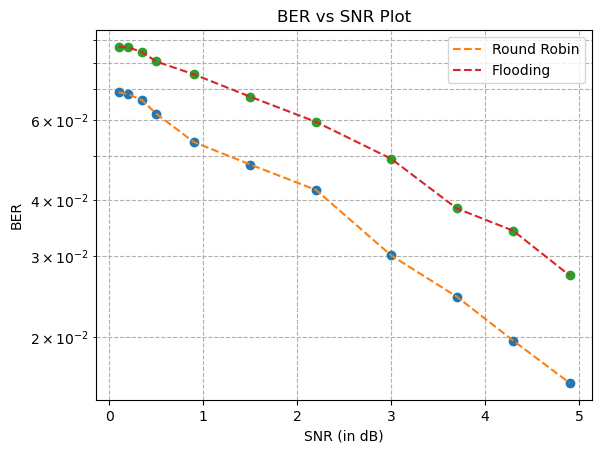

In [29]:
plt.plot(snrdb_vals, bers_round_robin, 'o')  
plt.plot(snrdb_vals, bers_round_robin, '--',label="Round Robin")
plt.plot(snrdb_vals, bers_flooding, 'o')  
plt.plot(snrdb_vals, bers_flooding, '--',label="Flooding")


plt.title("BER vs SNR Plot")
plt.ylabel("BER")
plt.xlabel("SNR (in dB)")
plt.legend()
plt.yscale('log')
plt.grid(True, which="both", ls="--")

